create sino :  (139, array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)) 

P :  [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] 

proj_id :  134 

sinogram :  [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] 

sinogram shape :  (180, 384) 

sinogram id :  136


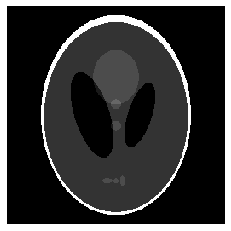

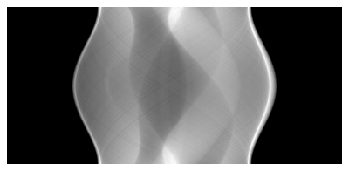

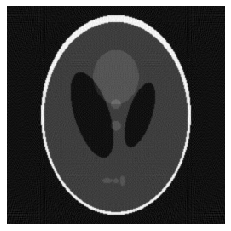

In [33]:
import astra
import numpy as np

vol_geom = astra.create_vol_geom(256, 256)
proj_geom = astra.create_proj_geom('parallel', 1.0, 384, np.linspace(0,np.pi,180,False))

# For CPU-based algorithms, a "projector" object specifies the projection
# model used. In this case, we use the "strip" model.
proj_id = astra.create_projector('strip', proj_geom, vol_geom)

# Create a sinogram from a phantom
import scipy.io
P = scipy.io.loadmat('phantom.mat')['phantom256']
sinogram_id, sinogram = astra.create_sino(P, proj_id)

print('create sino : ', astra.create_sino(P, proj_id), '\n')
print('P : ', P, '\n')
print('proj_id : ', proj_id, '\n')
print('sinogram : ', sinogram, '\n')
print('sinogram shape : ', sinogram.shape, '\n')
print('sinogram id : ', sinogram_id)

import pylab
pylab.gray()
pylab.figure(1)
pylab.axis('off')
pylab.imshow(P)
pylab.figure(2)
pylab.axis('off')

pylab.imshow(sinogram)

# Create a data object for the reconstruction
rec_id = astra.data2d.create('-vol', vol_geom)

# Set up the parameters for a reconstruction algorithm using the CPU
# The main difference with the configuration of a GPU algorithm is the
# extra ProjectorId setting.
cfg = astra.astra_dict('FBP')
cfg['ReconstructionDataId'] = rec_id
cfg['ProjectionDataId'] = sinogram_id
cfg['ProjectorId'] = proj_id

# Available algorithms:
# ART, SART, SIRT, CGLS, FBP


# Create the algorithm object from the configuration structure
alg_id = astra.algorithm.create(cfg)

# Run 20 iterations of the algorithm
# This will have a runtime in the order of 10 seconds.
astra.algorithm.run(alg_id, 20)

# Get the result
rec = astra.data2d.get(rec_id)
pylab.figure(3)
pylab.axis('off')
pylab.imshow(rec)
pylab.show()

# Clean up.
astra.algorithm.delete(alg_id)
astra.data2d.delete(rec_id)
astra.data2d.delete(sinogram_id)
astra.projector.delete(proj_id)

sinogram_T shape :  (361, 864) 

[[22.457989 18.00487  15.765974 ... 16.895426 17.612978 22.793247]
 [23.238548 20.13748  17.347225 ... 17.11644  20.658232 23.73168 ]
 [24.589708 23.534937 22.13914  ... 23.060162 24.225586 26.447496]
 ...
 [24.425251 23.86894  22.458532 ... 22.891582 24.409475 26.599756]
 [23.662083 20.569067 17.52441  ... 17.163391 20.630968 24.181267]
 [22.926733 18.439003 15.882926 ... 16.587229 17.564644 22.975496]]


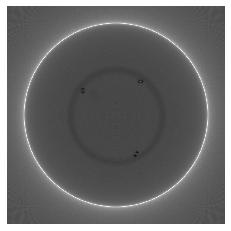

In [39]:
import astra
from astra import data2d
import numpy as np
from imageio import imread, imwrite
from os.path import join, isdir
import matplotlib.pyplot as plt

N = 1024
num_angles = 361
angles = np.linspace(0, 2*np.pi, num_angles, False)
num_detector_pixels = 864
rel_detector_size = 1.0

vol_geom = astra.create_vol_geom(N, N)
proj_geom = astra.create_proj_geom('parallel', rel_detector_size, num_detector_pixels, angles)

proj_id = astra.create_projector('linear', proj_geom, vol_geom)

#load sinogram
import scipy.io
sinogram = np.loadtxt('C:\\Users\\USER\\Desktop\\RP_lab\\XRF\\sinogram0514_Cylinder\\sinogram900.csv', delimiter=",", dtype=np.float32)
sinogram_T = np.transpose(sinogram)
sinogram_id = data2d.create('-sino', proj_geom, 0)
# print('sinogram_T : ', sinogram_T, '\n')
print('sinogram_T shape : ', sinogram_T.shape, '\n')
# print('sinogram id : ', sinogram_id)

rec_type = 'FBP'
filter_type = 'hann'

rec_id, rec = astra.create_reconstruction(rec_type, proj_id, sinogram_T, filterType = filter_type)

print(rec)
plt.axis('off')
plt.imshow(rec, cmap='gray')